# Neural Networks. Regression. Part 1

---

## Neural Networks: building, training


Applied Mathematical Modeling in Banking

---

У цій лекції ми скористаємося набором даних Boston: вартість житла у пригородах Бостона

# 1. Dataset description

In [1]:
install.packages("MASS")

Installing package into 'C:/Users/yura/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'MASS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	D:\Temp\RtmpE7F7Dp\downloaded_packages


`medv` is TARGET!

In [2]:
library(MASS)
?Boston

Boston {MASS},R Documentation


Переглянемо дані:

In [3]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [4]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [5]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

# 2. Data visualization

Lets move our dataset to special variable:

In [6]:
data <- Boston
head(data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Let's check a correlation between parameters: 

corrplot 0.88 loaded



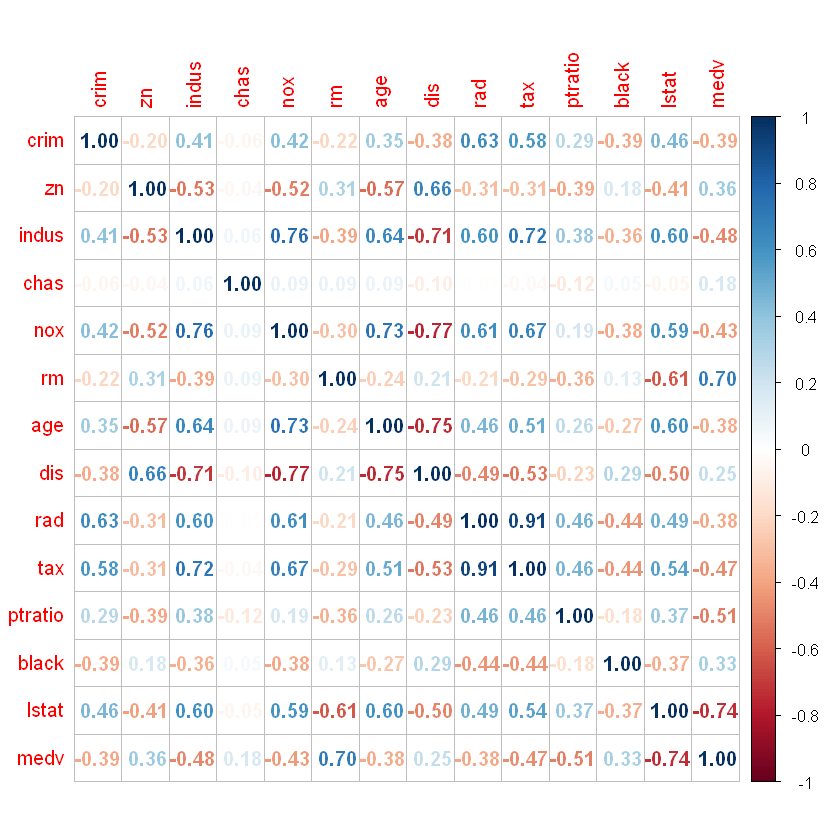

In [7]:
library(corrplot)
corrplot(cor(data) , method = "number") 

Rad and tax has highest correlation: 0.91

- [x] `rad` - index of accessibility to radial highways.
- [x] `tax` - full-value property-tax rate per $10,000.

Warning message:
"package 'ggplot2' was built under R version 4.1.0"


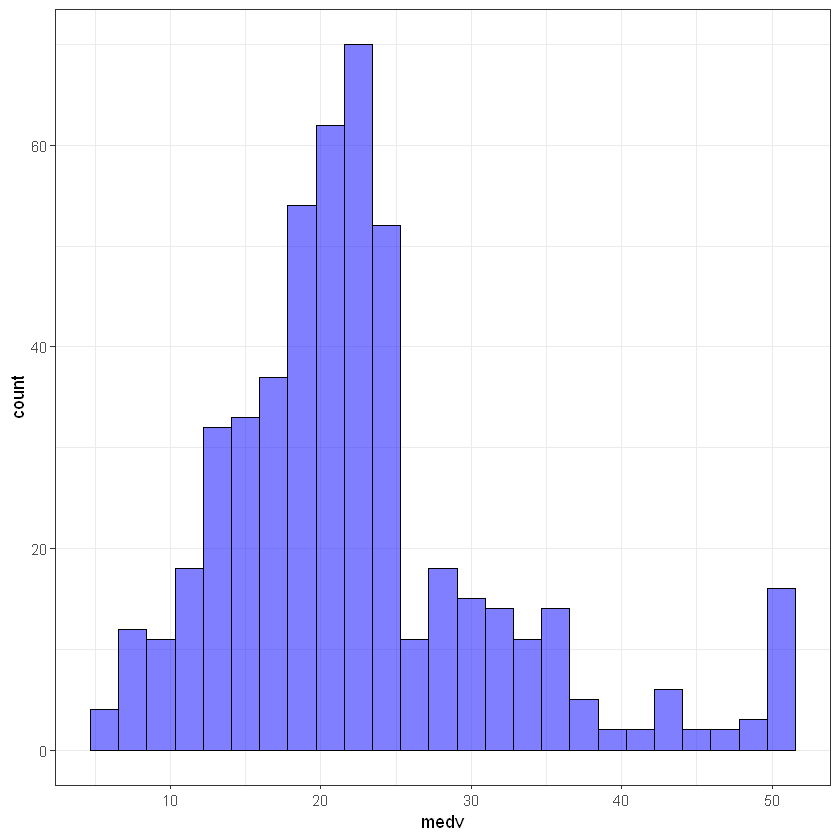

In [8]:
library(ggplot2)

ggplot(data, aes(medv)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

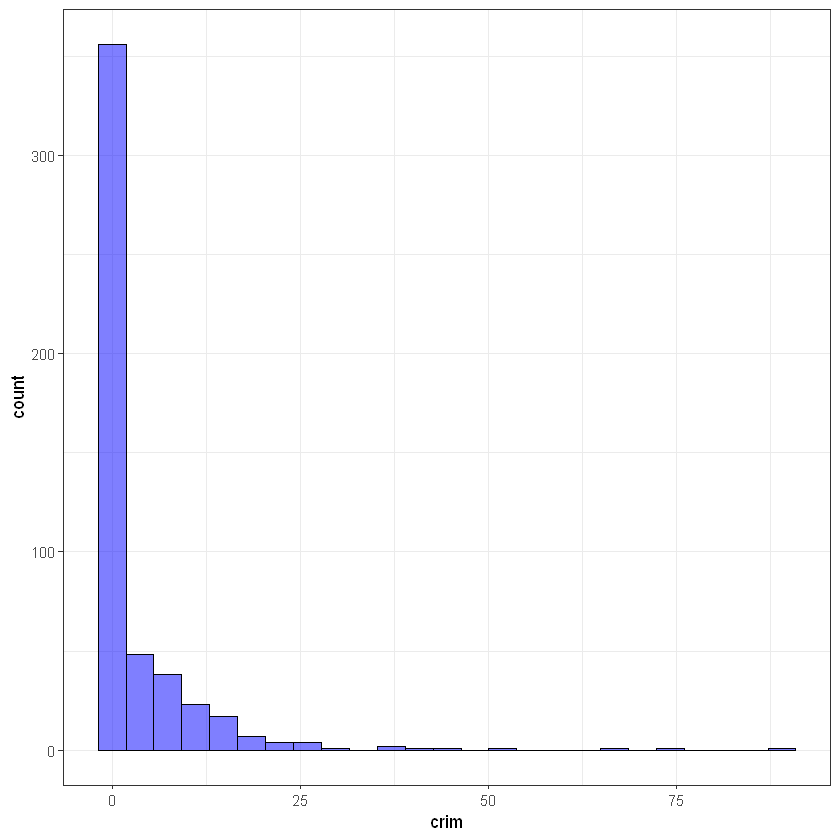

In [9]:
#crim
ggplot(data, aes(crim)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

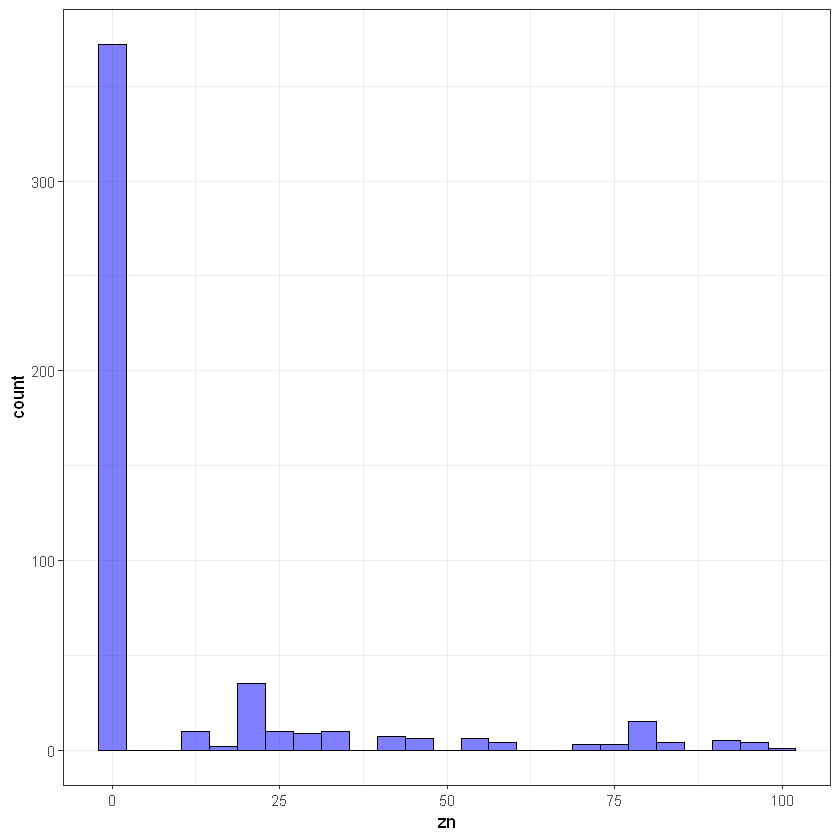

In [10]:
#zn
ggplot(data, aes(zn)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

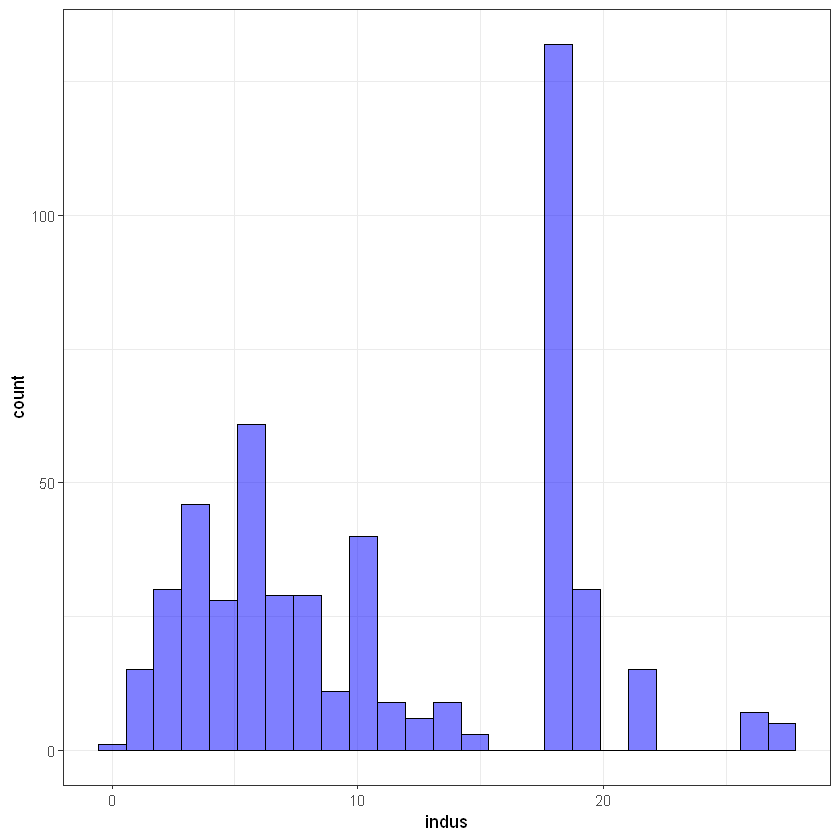

In [11]:
#indus
ggplot(data, aes(indus)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

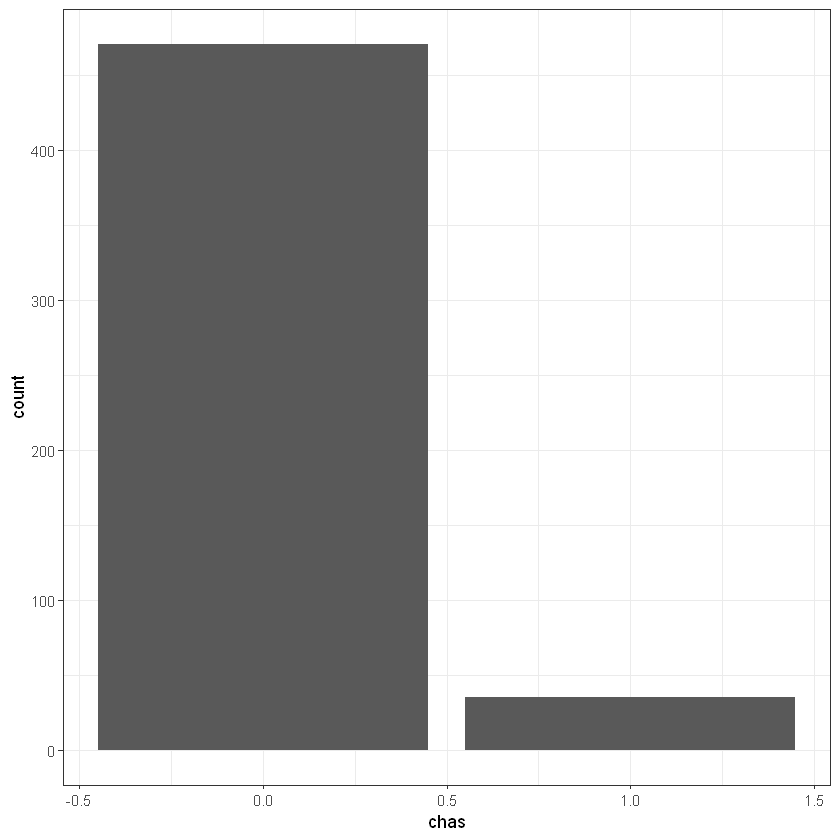

In [12]:
#chas 
ggplot(data, aes(chas)) + 
    geom_bar(aes(fill = chas)) + 
    theme_bw()

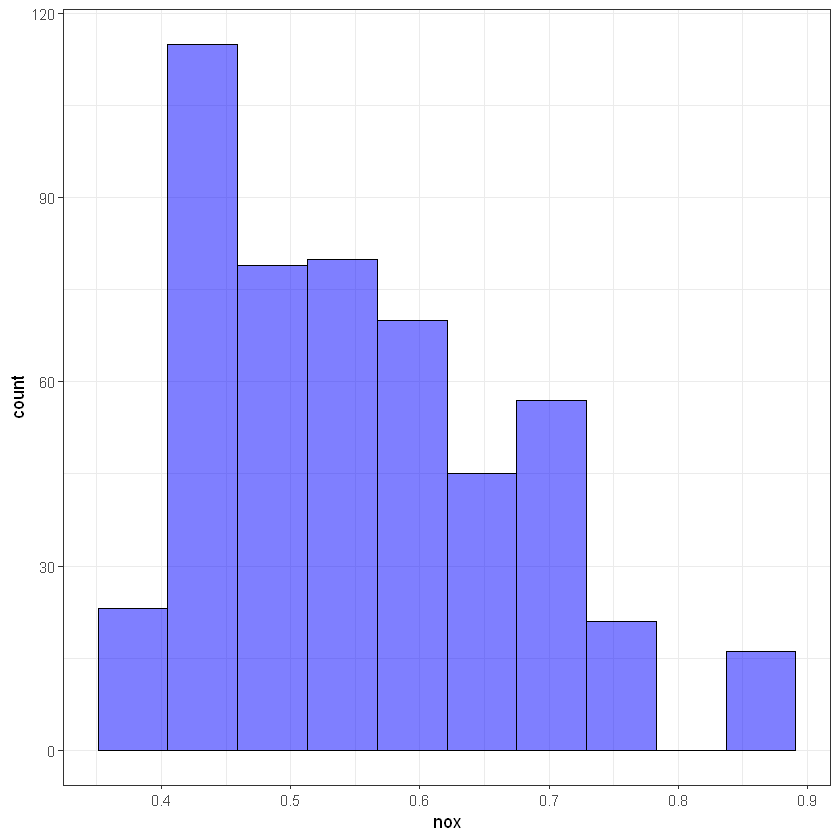

In [13]:
# nox
ggplot(data, aes(nox)) + 
    geom_histogram(bins = 10, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

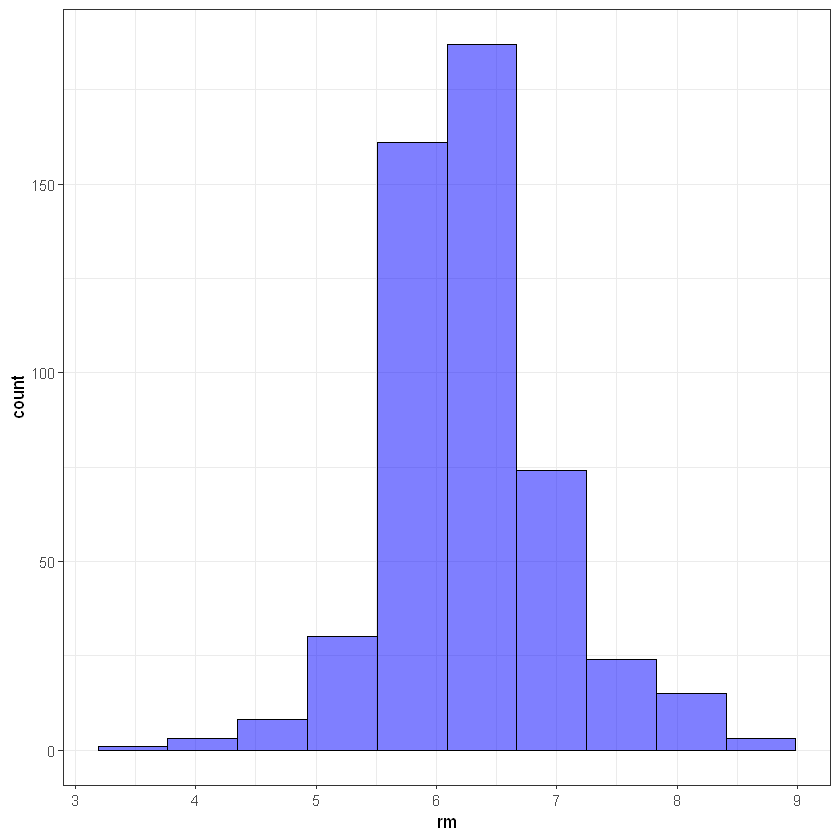

In [14]:
# rm
ggplot(data, aes(rm)) + 
    geom_histogram(bins = 10, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

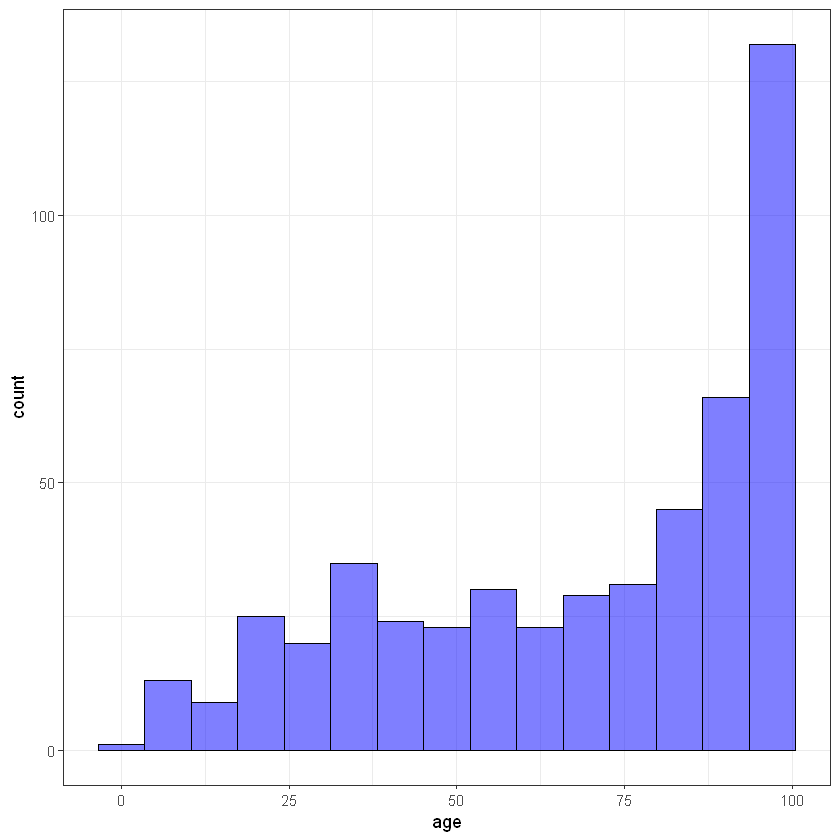

In [15]:
# age
ggplot(data, aes(age)) + 
    geom_histogram(bins = 15, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

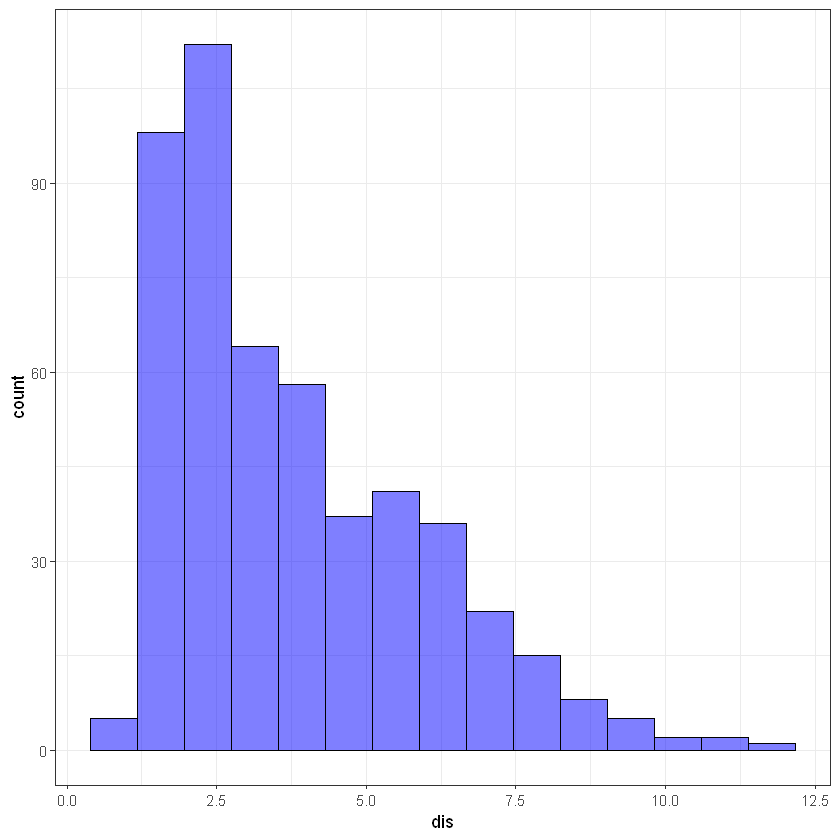

In [16]:
# dis
ggplot(data, aes(dis)) + 
    geom_histogram(bins = 15, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

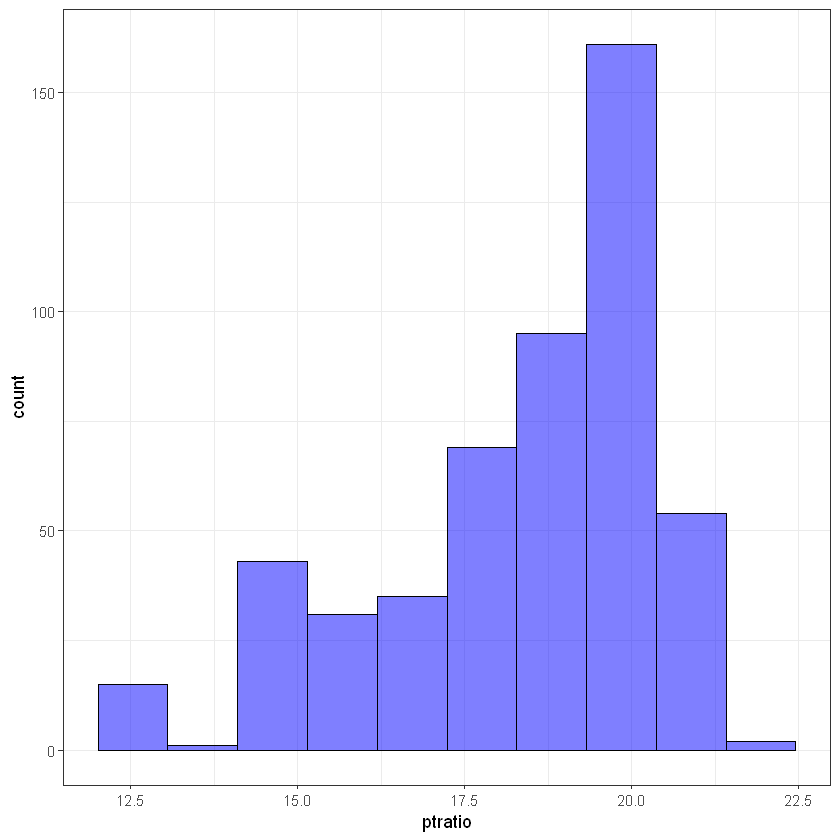

In [17]:
#rad
ggplot(data, aes(ptratio)) + 
    geom_histogram(bins = 10, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

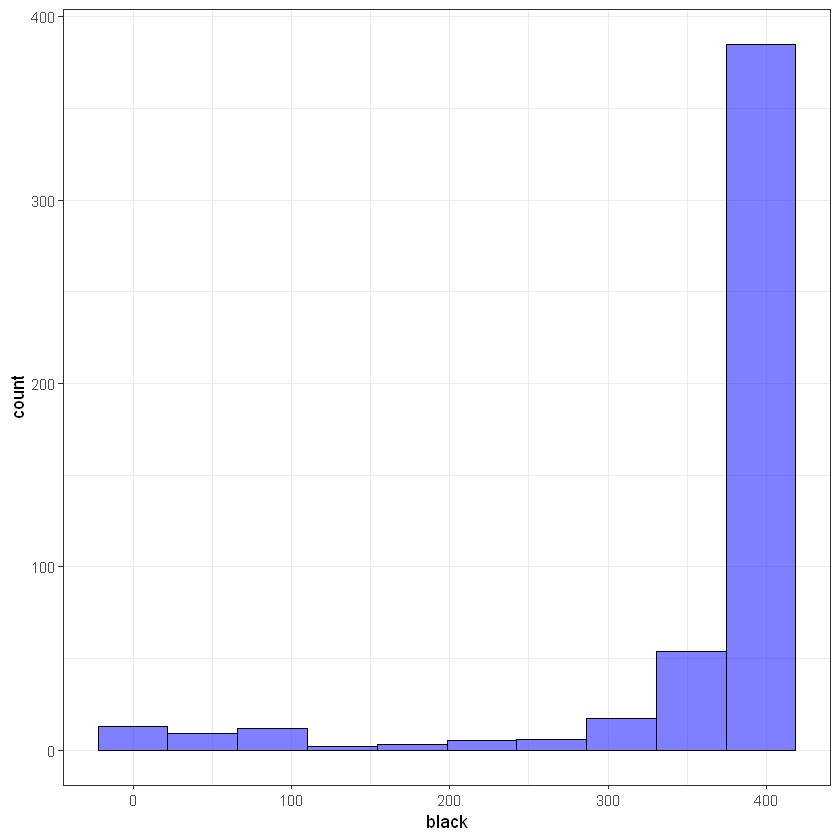

In [18]:
# black
ggplot(data, aes(black)) + 
    geom_histogram(bins = 10, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

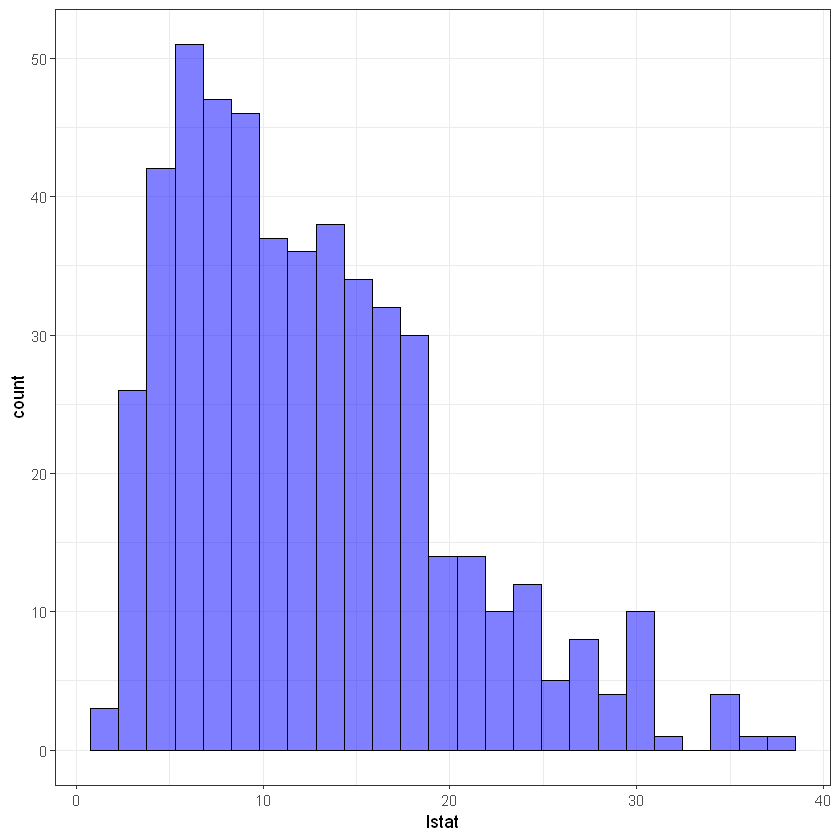

In [19]:
# lstat
ggplot(data, aes(lstat)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

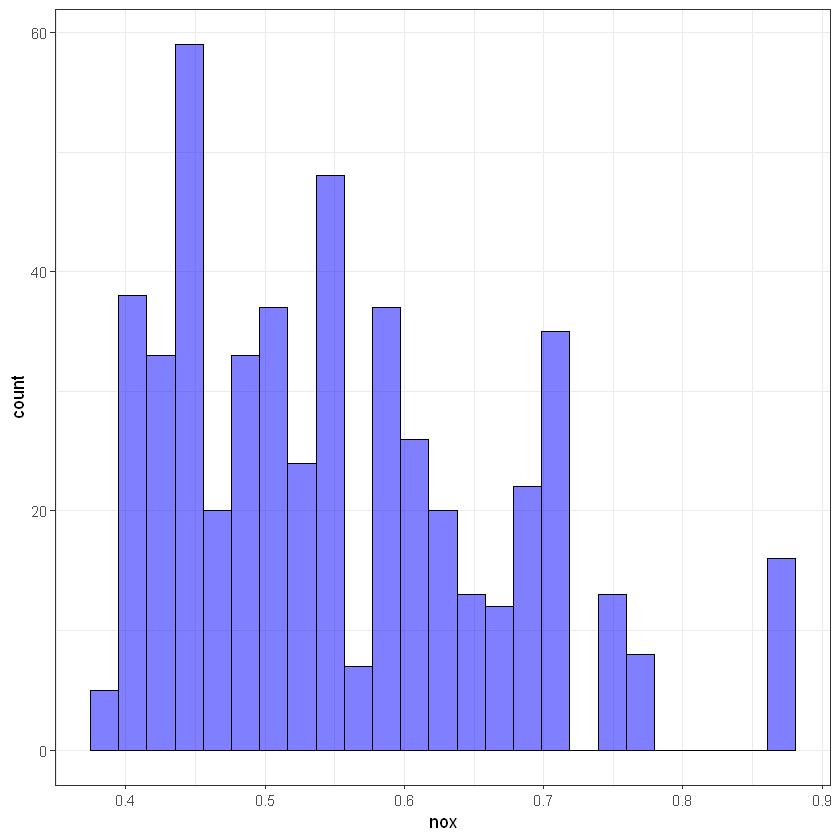

In [20]:
# nox
ggplot(data, aes(nox)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

---

# 3. Data scaling

Для роботи з нейромережами хорошою практикою є нормалізація даних перед використанням. Скористаємося формулою $(X-Xmin)/(Xmax-Xmin)$.

Визначимо мінімальні та максимальні значення по факторах:

In [21]:
max_values <- apply(X = data, MARGIN = 2, FUN = max)
max_values 

crim       zn    indus     chas      nox       rm      age      dis 
 88.9762 100.0000  27.7400   1.0000   0.8710   8.7800 100.0000  12.1265 
     rad      tax  ptratio    black    lstat     medv 
 24.0000 711.0000  22.0000 396.9000  37.9700  50.0000

In [22]:
min_values <- apply(X = data, MARGIN = 2, FUN = min)
min_values 

crim        zn     indus      chas       nox        rm       age       dis 
  0.00632   0.00000   0.46000   0.00000   0.38500   3.56100   2.90000   1.12960 
      rad       tax   ptratio     black     lstat      medv 
  1.00000 187.00000  12.60000   0.32000   1.73000   5.00000

Нормалізуємо значення за один раз у всьому датафреймі:

In [23]:
scaled_data <- scale(data, center = min_values, scale = max_values - min_values)
scaled_data <- data.frame(scaled_data)

Переглянемо як змінився вигляд значень:

In [24]:
head(scaled_data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.0000000000,0.18,0.06781525,0,0.3148148,0.5775053,0.6416066,0.2692031,0.00000000,0.20801527,0.2872340,1.0000000,0.08967991,0.4222222
2,0.0002359225,0.00,0.24230205,0,0.1728395,0.5479977,0.7826982,0.3489620,0.04347826,0.10496183,0.5531915,1.0000000,0.20447020,0.3688889
3,0.0002356977,0.00,0.24230205,0,0.1728395,0.6943859,0.5993821,0.3489620,0.04347826,0.10496183,0.5531915,0.9897373,0.06346578,0.6600000
4,0.0002927957,0.00,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
5,0.0007050701,0.00,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
6,0.0002644715,0.00,0.06304985,0,0.1502058,0.5497222,0.5746653,0.4485446,0.08695652,0.06679389,0.6489362,0.9929901,0.09602649,0.5266667


In [25]:
head(data) # initial data for compare

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


---

# 4. Train/test split

Сформуємо вибірки з пропорцією 70/30 % значень:

In [26]:
library(caTools)
set.seed(111)
split <- sample.split(scaled_data$medv, SplitRatio = 0.7)
train_data <- subset(scaled_data, split == TRUE)
test_data <- subset(scaled_data, split == FALSE)

Let's check how target's are distrubuted in both samples:

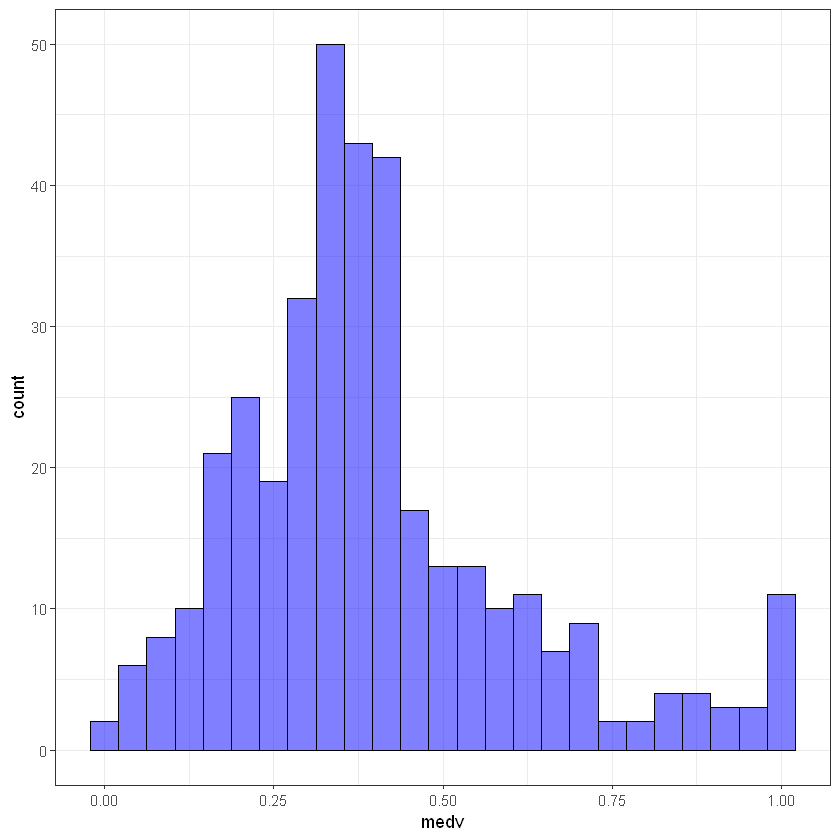

In [27]:
# train
ggplot(train_data, aes(medv)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

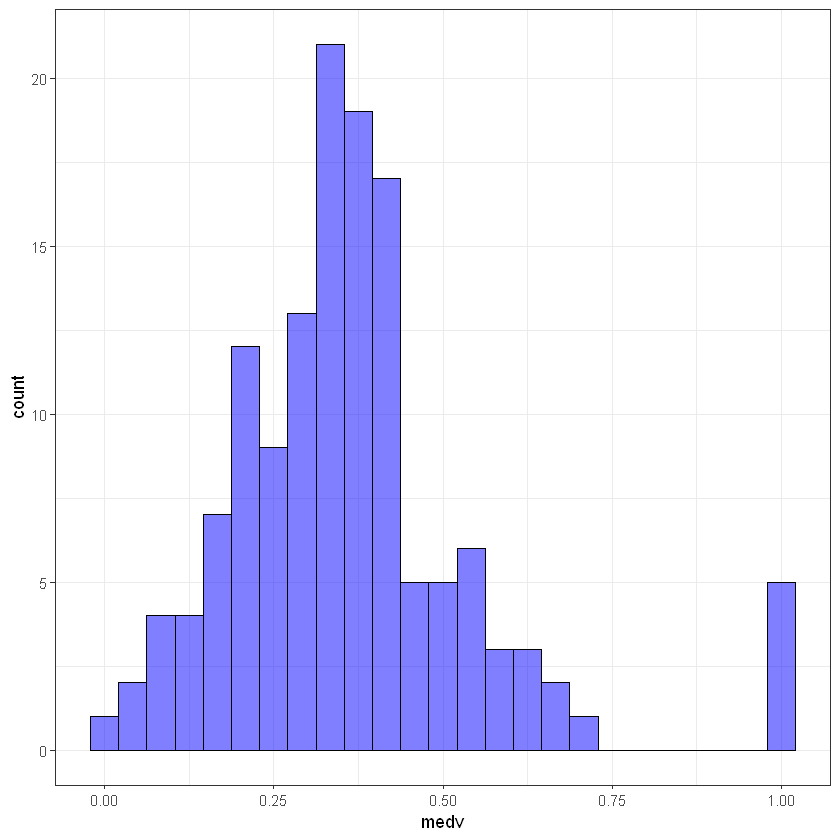

In [28]:
# test
ggplot(test_data, aes(medv)) + 
    geom_histogram(bins = 25, alpha = 0.5, fill = 'blue', color='black')  + 
    theme_bw()

---

# 5. Baseline (Linear regression)

Для порівняння ефективності використання нейронних мереж скористаємося для початку лінійною регресією:

In [29]:
lm_model <- lm(medv ~ ., data = train_data)
summary(lm_model)


Call:
lm(formula = medv ~ ., data = train_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32496 -0.06311 -0.01192  0.04336  0.56005 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.49146    0.06574   7.476 6.11e-13 ***
crim        -0.17348    0.12783  -1.357 0.175608    
zn           0.10752    0.03685   2.918 0.003751 ** 
indus        0.03863    0.04814   0.803 0.422761    
chas         0.04662    0.02281   2.044 0.041736 *  
nox         -0.25082    0.05347  -4.691 3.90e-06 ***
rm           0.42499    0.05800   7.327 1.61e-12 ***
age          0.02782    0.03472   0.801 0.423446    
dis         -0.36673    0.05921  -6.194 1.64e-09 ***
rad          0.16375    0.04390   3.730 0.000223 ***
tax         -0.15722    0.05508  -2.854 0.004568 ** 
ptratio     -0.19328    0.03430  -5.635 3.58e-08 ***
black        0.08439    0.03129   2.697 0.007328 ** 
lstat       -0.45956    0.05013  -9.168  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**

Здійснимо прогноз тестових значень:

In [30]:
test_lm_predicted_scaled <- predict(lm_model, test_data)
head(test_lm_predicted_scaled)

4         5        10        11        20        21 
0.5307311 0.5153752 0.3090266 0.3086393 0.3031652 0.1709297

Оскільки ми дані нормували, тепер потрібно вихідний показник реальний та прогнозований повернути до початкового стану (без нормалізації):

Для початку знайдемо максимум та мінімум виходу `medv`:

In [31]:
min_out <- min_values[length(min_values)]
max_out <- max_values[length(max_values)]
min_out
max_out

medv 
   5

medv 
  50

Зробимо перетворення прогнозованих даних до початкової форми:

In [32]:
test_lm_predicted <- test_lm_predicted_scaled * (max_out - min_out) + min_out
head(test_lm_predicted)

4        5       10       11       20       21 
28.88290 28.19188 18.90620 18.88877 18.64244 12.69184

Перетворимо також оригінальні дані у зворотрьому порядку:

In [33]:
head(test_data$medv)
test_medv <- test_data$medv * (max_out - min_out) + min_out
head(test_medv)

[1] 0.6311111 0.6933333 0.3088889 0.2222222 0.2933333 0.1911111

[1] 33.4 36.2 18.9 15.0 18.2 13.6

Let's check errors and R^2:

In [34]:
library(modelr)
# need for next comparison
linear_err <- data.frame(
  R2 = rsquare(lm_model, data = test_data),
  MSE = mse(lm_model, data = test_data),
  RMSE = rmse(lm_model, data = test_data)  
)
linear_err 

R2,MSE,RMSE
<dbl>,<dbl>,<dbl>
0.768679,0.007872404,0.08872657


---

# 6. Побудова нейромережі за допомогою `neuralnet`

Підключаємо пакет neuralnet:

In [35]:
install.packages("neuralnet")

Installing package into 'C:/Users/yura/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	D:\Temp\RtmpE7F7Dp\downloaded_packages


In [36]:
library(neuralnet)

Для побудови моделі потрібно згенерувати формулу у форматі $y ~ x_1 + x_2 + ... + x_n$

In [37]:
nms <- colnames(data)
formula <- as.formula(paste(nms[length(nms)], paste(nms[1:(length(nms)-1)], collapse = " + "), sep = " ~ "))
formula

medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

Будуємо модель за допомогою фунуції `neuralnet()`:

`hidden = c(3,4)` - перший прихований шар буде мати 3 нейрони, другий 4
`linear.output` - вихідний показник неперервне число. Не класифікація

In [38]:
nn_model <- neuralnet(formula = formula, data = train_data, hidden = c(3,4), linear.output = TRUE)

Візуалізуємо модель:

In [39]:
plot(nn_model)

Також для візуалізація можна скористатися функцією `plot.nnet()`, опубілкованою на відкритому ресурсі одним із користувачів мережі Інтернет:

In [40]:
library(devtools)
install.packages("clusterGeneration")

Warning message:
"package 'devtools' was built under R version 4.1.0"
Loading required package: usethis

Warning message:
"package 'usethis' was built under R version 4.1.0"
Installing package into 'C:/Users/yura/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'clusterGeneration' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	D:\Temp\RtmpE7F7Dp\downloaded_packages


In [41]:
library(clusterGeneration)

In [42]:
source_url('https://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')

i SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef



Loading required package: scales

Warning message:
"package 'scales' was built under R version 4.1.0"
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"
Loading requi

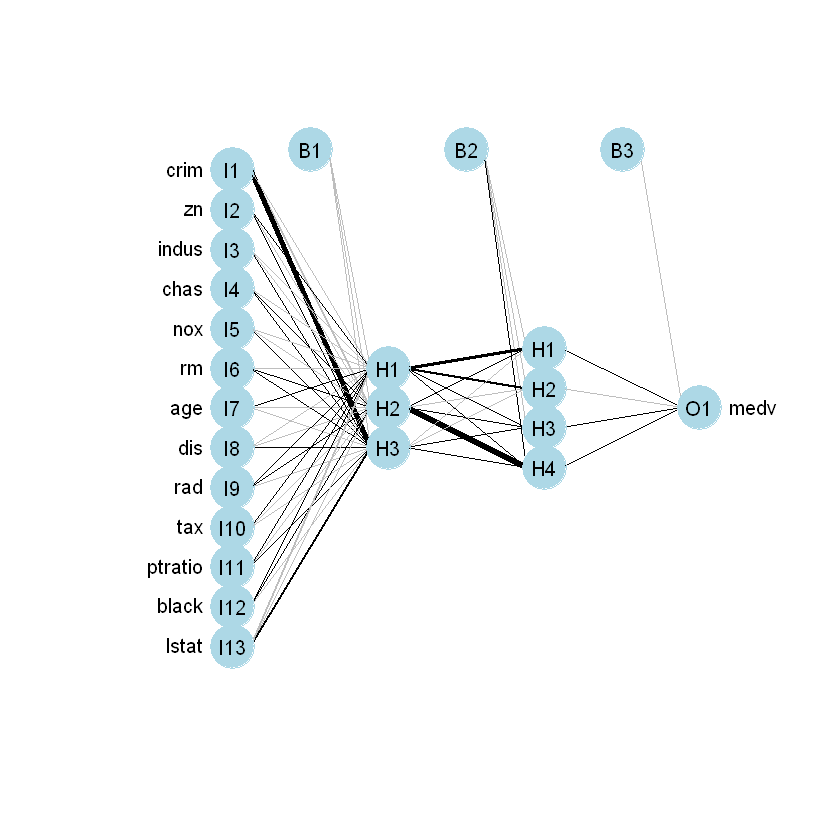

In [43]:
plot.nnet(nn_model)

Preview neural network matrix as text:

In [44]:
nn_model$result.matrix

error,5.484041e-01
reached.threshold,9.298425e-03
steps,5.220000e+03
Intercept.to.1layhid1,-2.718862e+00
crim.to.1layhid1,-5.317584e+00
zn.to.1layhid1,6.278400e-01
indus.to.1layhid1,-2.105641e-01
chas.to.1layhid1,-3.751735e-01
nox.to.1layhid1,-2.129627e+00
rm.to.1layhid1,-1.129300e+00
age.to.1layhid1,1.268785e+00


Здійснимо прогноз для тестової вибірки та повернемо значення до базового виміру:

In [45]:
test_predicted_scaled <- compute(nn_model, test_data[1:(length(test_data)-1)])
head(test_predicted_scaled)

,,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
4,1,0.0002927957,0.000,0.06304985,0,0.15020576,0.6585553,0.44181256,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852
5,1,0.0007050701,0.000,0.06304985,0,0.15020576,0.6871048,0.52832132,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775
10,1,0.0018401733,0.125,0.27162757,0,0.28600823,0.4680973,0.85478888,0.4967309,0.17391304,0.23664122,0.2765957,0.9743053,0.42411700
11,1,0.0024566741,0.125,0.27162757,0,0.28600823,0.5395670,0.94129763,0.4744155,0.17391304,0.23664122,0.2765957,0.9889556,0.51655629
20,1,0.0080867817,0.000,0.28152493,0,0.31481481,0.4150220,0.68589083,0.2425138,0.13043478,0.22900763,0.8936170,0.9849967,0.26352097
21,1,0.0139987825,0.000,0.28152493,0,0.31481481,0.3849396,0.98043254,0.2426411,0.13043478,0.22900763,0.8936170,0.9487367,0.53228477
22,1,0.0095056889,0.000,0.28152493,0,0.31481481,0.4606246,0.88877446,0.2621375,0.13043478,0.22900763,0.8936170,0.9889808,0.33388521
23,1,0.0137816304,0.000,0.28152493,0,0.31481481,0.4945392,0.91452111,0.2589184,0.13043478,0.22900763,0.8936170,1.0000000,0.46881898
24,1,0.0110386796,0.000,0.28152493,0,0.31481481,0.4315003,1.00000000,0.2696760,0.13043478,0.22900763,0.8936170,0.9940491,0.50082781
25,1,0.0083617062,0.000,0.28152493,0,0.31481481,0.4527687,0.93923790,0.2973565,0.13043478,0.22900763,0.8936170,0.9935196,0.40204194


Convert `$net.result` to original form:

In [46]:
test_nn_predicted <- test_predicted_scaled$net.result * (max_out - min_out) + min_out
head(test_nn_predicted)

4,33.07236
5,30.08621
10,20.07867
11,20.51314
20,18.94824
21,15.61543


Порівняємо похибки та $R^2$ по лінійній регресії та першій нейронній мережі:

In [47]:
head(test_data)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,0.0002927957,0.000,0.06304985,0,0.1502058,0.6585553,0.4418126,0.4485446,0.08695652,0.06679389,0.6489362,0.9942761,0.03338852,0.6311111
5,0.0007050701,0.000,0.06304985,0,0.1502058,0.6871048,0.5283213,0.4485446,0.08695652,0.06679389,0.6489362,1.0000000,0.09933775,0.6933333
10,0.0018401733,0.125,0.27162757,0,0.2860082,0.4680973,0.8547889,0.4967309,0.17391304,0.23664122,0.2765957,0.9743053,0.42411700,0.3088889
11,0.0024566741,0.125,0.27162757,0,0.2860082,0.5395670,0.9412976,0.4744155,0.17391304,0.23664122,0.2765957,0.9889556,0.51655629,0.2222222
20,0.0080867817,0.000,0.28152493,0,0.3148148,0.4150220,0.6858908,0.2425138,0.13043478,0.22900763,0.8936170,0.9849967,0.26352097,0.2933333
21,0.0139987825,0.000,0.28152493,0,0.3148148,0.3849396,0.9804325,0.2426411,0.13043478,0.22900763,0.8936170,0.9487367,0.53228477,0.1911111


In [48]:
library(Metrics) # for rmse function
neural_err <- data.frame(
  R2 = cor(test_data$medv, test_predicted_scaled$net.result) ^ 2,
  MSE = mse(test_data$medv, test_predicted_scaled$net.result),
  RMSE = rmse(test_data$medv, test_predicted_scaled$net.result)  
)

linear_err 
neural_err 

# Model is much better by all metrics


Attaching package: 'Metrics'


The following objects are masked from 'package:modelr':

    mae, mape, mse, rmse




R2,MSE,RMSE
<dbl>,<dbl>,<dbl>
0.768679,0.007872404,0.08872657


R2,MSE,RMSE
<dbl>,<dbl>,<dbl>
0.8361475,0.006059023,0.07783972


---

# 7. Neural network with `nnet`

Підключаємо пакет `nnet` для побудови нейромережі із `2-vf` прихованими шарами, для прикладу:

In [49]:
install.packages("nnet")

Installing package into 'C:/Users/yura/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'nnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	D:\Temp\RtmpE7F7Dp\downloaded_packages


Підключаємо пакет nnet для побудови нейромережі із 1 прихованим шаром:

In [50]:
library(nnet)
help(nnet)

nnet {nnet},R Documentation
formula,A formula of the form class ~ x1 + x2 + ...
x,matrix or data frame of x values for examples.
y,matrix or data frame of target values for examples.
weights,(case) weights for each example – if missing defaults to 1.
size,number of units in the hidden layer. Can be zero if there are skip-layer units.
data,Data frame from which variables specified in formula are preferentially to be taken.
subset,"An index vector specifying the cases to be used in the training sample. (NOTE: If given, this argument must be named.)"
na.action,"A function to specify the action to be taken if NAs are found. The default action is for the procedure to fail. An alternative is na.omit, which leads to rejection of cases with missing values on any required variable. (NOTE: If given, this argument must be named.)"
contrasts,a list of contrasts to be used for some or all of the factors appearing as variables in the model formula.
Wts,initial parameter vector. If missing chosen at random.


Будуємо модель на основі формули створеної для попередньої моделі:

* `size` - кількість нейронів у прихованому шарі

In [51]:
nnet_model <- nnet(formula, data = train_data, size = 2, maxit = 100)

# weights:  31
initial  value 19.340054 
iter  10 value 6.323179
iter  20 value 3.077990
iter  30 value 2.728765
iter  40 value 2.596557
iter  50 value 2.557945
iter  60 value 2.511178
iter  70 value 2.456081
iter  80 value 2.359112
iter  90 value 2.187977
iter 100 value 2.135018
final  value 2.135018 
stopped after 100 iterations


In [52]:
summary(nnet_model)

a 13-2-1 network with 31 weights
options were -
  b->h1  i1->h1  i2->h1  i3->h1  i4->h1  i5->h1  i6->h1  i7->h1  i8->h1  i9->h1 
  -9.67   -1.33   -0.37    2.07   -1.26    2.67    9.76   -1.10    2.86   -2.95 
i10->h1 i11->h1 i12->h1 i13->h1 
  -0.99   -1.07    1.86    1.56 
  b->h2  i1->h2  i2->h2  i3->h2  i4->h2  i5->h2  i6->h2  i7->h2  i8->h2  i9->h2 
   0.31    1.77   -0.15    0.48   -0.48    1.74    1.10   -0.37    2.00   -1.11 
i10->h2 i11->h2 i12->h2 i13->h2 
   0.19    0.08   -0.36    2.80 
 b->o h1->o h2->o 
 7.61  4.15 -9.68 

Візуалізуємо модель:

Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"
Loading required package: reshape

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, lo

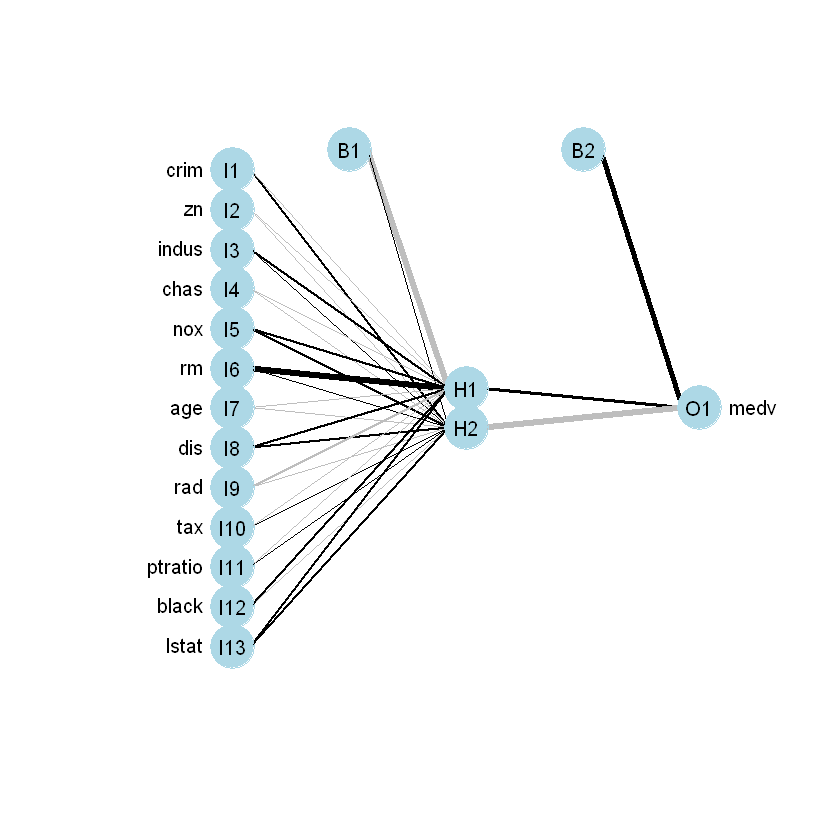

In [53]:
plot.nnet(nnet_model)

Здійснимо прогноз для тестової вибірки та повернемо значення до базового виміру:

In [54]:
test_predicted_scaled <- predict(nnet_model, test_data)
head(test_predicted_scaled)
test_nnet_predicted <- test_predicted_scaled * (max_out - min_out) + min_out

4,0.6110278
5,0.6222705
10,0.2713169
11,0.3362039
20,0.3002474
21,0.2040696


Порівняємо похибки по лінійній регресії та нейронних мереж:

In [55]:
nnet_err <- data.frame(
  R2 = cor(test_data$medv, test_predicted_scaled) ^ 2,
  MSE = mse(test_data$medv, test_predicted_scaled),
  RMSE = rmse(test_data$medv, test_predicted_scaled)  
)

linear_err 
neural_err 
nnet_err

# neuralnet wins! but remember it has more layers

R2,MSE,RMSE
<dbl>,<dbl>,<dbl>
0.768679,0.007872404,0.08872657


R2,MSE,RMSE
<dbl>,<dbl>,<dbl>
0.8361475,0.006059023,0.07783972


R2,MSE,RMSE
<dbl>,<dbl>,<dbl>
0.8440113,0.005304423,0.07283147


---

# 8. Final models compare

Побудуємо графік розподілу пронозованих значень показників по усх моделях:

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

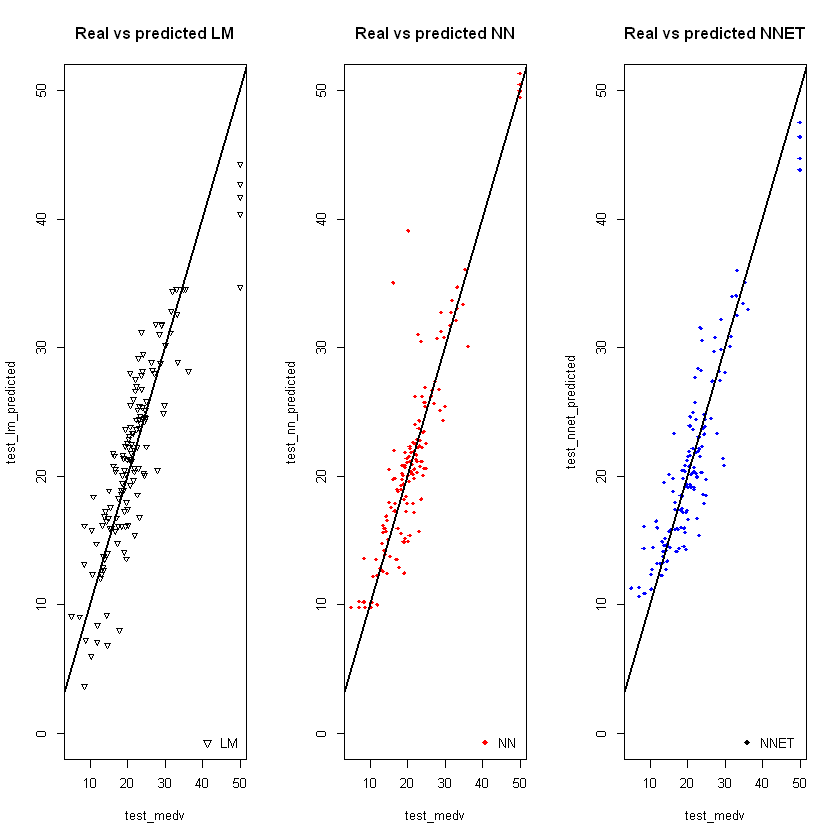

In [56]:
#Однакові межі для усіх графіків по Y
plot_ylim <- c(0,50)

par(mfrow=c(1,3)) # три стовпці, 1 рядок
# pch  - тип точки для графіку
plot(test_medv,test_lm_predicted,col='black', ylim=plot_ylim, main='Real vs predicted LM', pch=25, cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='LM',pch=25,col='black', bty='n')

plot(test_medv,test_nn_predicted, col='red', ylim=plot_ylim, main='Real vs predicted NN',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='NN',pch=18,col='red', bty='n')

plot(test_medv,test_nnet_predicted,col='blue', ylim=plot_ylim, main='Real vs predicted NNET',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend='NNET',pch=18, col='black', bty='n')


Combine all to one chart:

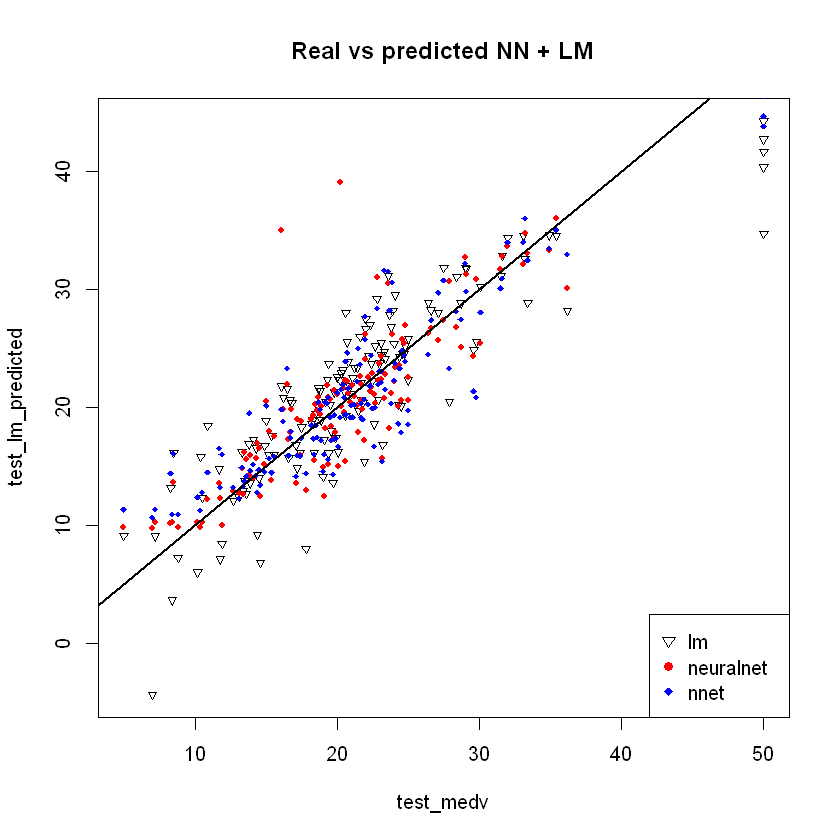

In [57]:
par(mfrow=c(1,1))

plot(test_medv,test_lm_predicted,col='black',main='Real vs predicted NN + LM',pch=25,cex=0.7)
points(test_medv,test_nn_predicted,col='red',pch=19,cex=0.7)
points(test_medv,test_nnet_predicted,col='blue',pch=18,cex=0.7)
abline(0,1,lwd=2)
legend('bottomright',legend=c('lm','neuralnet','nnet'),pch=c(25,19,18),col=c('black', 'red','blue'))

---

# References

1. Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

2. Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.
